# 0.5_dimension_reduction

In [2]:
%run util.py

In [4]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [5]:
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

In [8]:
X_train, X_test, y_train, y_tet = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc = StandardScaler()

In [11]:
X_train_std = sc.fit_transform(X_train)

In [12]:
X_test_std = sc.transform(X_test)

In [13]:
cov_mat = np.cov(X_train_std.T)

In [14]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [15]:
eigen_vals

array([4.84274532, 2.41602459, 1.54845825, 0.96120438, 0.84166161,
       0.6620634 , 0.51828472, 0.34650377, 0.3131368 , 0.10754642,
       0.21357215, 0.15362835, 0.1808613 ])

In [16]:
tot = sum(eigen_vals)

In [17]:
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]

In [18]:
cum_var_exp = np.cumsum(var_exp)

Text(0, 0.5, 'Explained variance ratio')

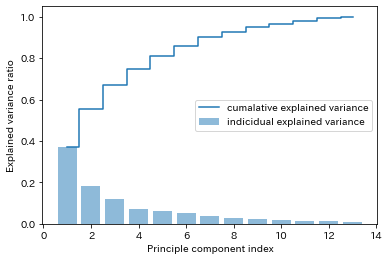

In [22]:
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center', label='indicidual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid', label='cumalative explained variance')
plt.legend()
plt.xlabel('Principle component index')
plt.ylabel('Explained variance ratio')

In [35]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

In [36]:
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [37]:
w = np.hstack(
    (eigen_pairs[0][1][:, np.newaxis],
    eigen_pairs[1][1][:, np.newaxis]))

In [38]:
w

array([[-0.13724218,  0.50303478],
       [ 0.24724326,  0.16487119],
       [-0.02545159,  0.24456476],
       [ 0.20694508, -0.11352904],
       [-0.15436582,  0.28974518],
       [-0.39376952,  0.05080104],
       [-0.41735106, -0.02287338],
       [ 0.30572896,  0.09048885],
       [-0.30668347,  0.00835233],
       [ 0.07554066,  0.54977581],
       [-0.32613263, -0.20716433],
       [-0.36861022, -0.24902536],
       [-0.29669651,  0.38022942]])

In [39]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

In [40]:
X_train_pca = X_train_std.dot(w)

r 1 s
b 2 x
g 3 o


Text(0, 0.5, 'PC 2')

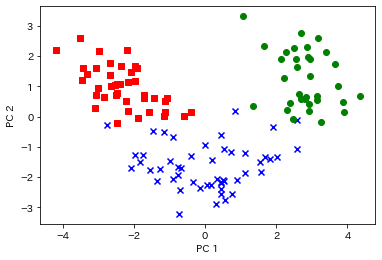

In [44]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(
        X_train_pca[y_train==l, 0], 
        X_train_pca[y_train==l, 1], 
        c=c, label=l, marker=m)
    print(c, l, m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [47]:
pca = PCA(n_components=2)

In [48]:
lr = LogisticRegression()

In [57]:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [58]:
lr.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

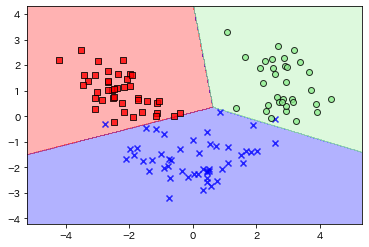

In [59]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)

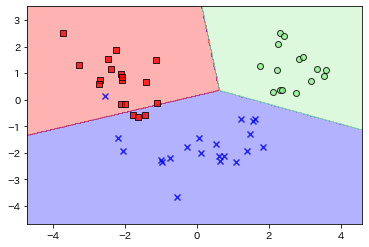

In [60]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)

In [61]:
pca.explained_variance_ratio_

array([0.36951469, 0.18434927])

In [62]:
pca = PCA(n_components=None)

In [63]:
X_train_pca = pca.fit_transform(X_train_std)

In [64]:
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

In [65]:
np.set_printoptions(precision=4)

In [68]:
mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))
    print(f"MV {label}, {mean_vecs[label-1]}")

MV 1, [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]
MV 2, [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]
MV 3, [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]


In [69]:
d = 13
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))
    for row in X_train_std[y_train==label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)
        class_scatter += (row-mv).dot((row-mv).T)
    S_W += class_scatter

print(f"Within-class scatter matrix {S_W.shape[0]}, {S_W.shape[1]}")

Within-class scatter matrix 13, 13


In [70]:
np.bincount(y_train)[1:]

array([41, 50, 33])

In [72]:
# normalized (and easier)
d = 13
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train==label].T)
    S_W += class_scatter

print(f"Within-class scatter matrix {S_W.shape[0]}, {S_W.shape[1]}")

Within-class scatter matrix 13, 13


In [76]:
mean_overall = np.mean(X_train_std, axis=0)
d = 13
S_B = np.zeros((d, d))

for i, mean_vec in enumerate(mean_vecs):
    n = X_train[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1) # to column vec
    mean_overall = mean_overall.reshape(d, 1)
    S_B += n * (mean_vec-mean_overall).dot((mean_vec-mean_overall).T)
print("Between class scatter matrix", S_B.shape)

Between class scatter matrix (13, 13)


In [77]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [80]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

In [81]:
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

In [82]:
for eigen_val in eigen_pairs:
    print(eigen_val[0])

349.61780890599397
172.7615221897938
3.389259780547781e-14
2.842170943040401e-14
1.9284611807586422e-14
1.9284611807586422e-14
1.8639179987230033e-14
1.8639179987230033e-14
7.057897559458914e-15
7.057897559458914e-15
6.596592553773414e-15
3.81059209269662e-15
3.3908455462202616e-15


In [83]:
tot = sum(eigen_vals.real)

In [84]:
discr = [(i/tot) for i in sorted(eigen_vals.real, reverse=True)]

In [87]:
discr

[0.6692795600710418,
 0.33072043992895805,
 5.4408181446965336e-17,
 1.2627973890038555e-17,
 1.2268875720713816e-17,
 1.2268875720713816e-17,
 6.491155649491974e-18,
 1.5479336485676723e-18,
 1.5479336485676723e-18,
 -7.29468389322218e-18,
 -3.639300152194315e-17,
 -3.639300152194315e-17,
 -6.488119990195971e-17]

In [88]:
cum_discr = np.cumsum(discr)

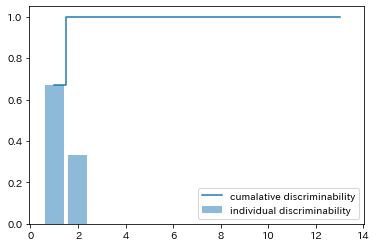

In [90]:
plt.bar(range(1, 14), discr, alpha=.5, align='center', label='individual discriminability')
plt.step(range(1, 14), cum_discr, where='mid', label='cumalative discriminability')
plt.legend()

In [91]:
w = np.hstack((
    eigen_pairs[0][1][:, np.newaxis].real,
    eigen_pairs[1][1][:, np.newaxis].real
))

In [92]:
w

array([[-0.1481, -0.4092],
       [ 0.0908, -0.1577],
       [-0.0168, -0.3537],
       [ 0.1484,  0.3223],
       [-0.0163, -0.0817],
       [ 0.1913,  0.0842],
       [-0.7338,  0.2823],
       [-0.075 , -0.0102],
       [ 0.0018,  0.0907],
       [ 0.294 , -0.2152],
       [-0.0328,  0.2747],
       [-0.3547, -0.0124],
       [-0.3915, -0.5958]])

In [93]:
X_train_lda = X_train_std.dot(w)

Text(0, 0.5, 'LD2')

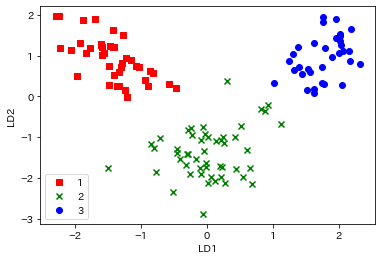

In [97]:
colors = ['r', 'g', 'b']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l, 0], X_train_lda[y_train==l, 1]*(-1), c=c, label=l, marker=m)
plt.legend()
plt.xlabel('LD1')
plt.ylabel('LD2')

In [98]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [99]:
lda = LDA(n_components=2)

In [100]:
X_train_lda = lda.fit_transform(X_train_std, y_train)

In [101]:
lr = LogisticRegression()

In [102]:
lr = lr.fit(X_train_lda, y_train)

Text(0, 0.5, 'LD2')

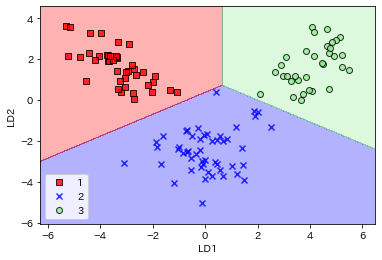

In [107]:
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.legend()
plt.xlabel('LD1')
plt.ylabel('LD2')

Text(0, 0.5, 'LD2')

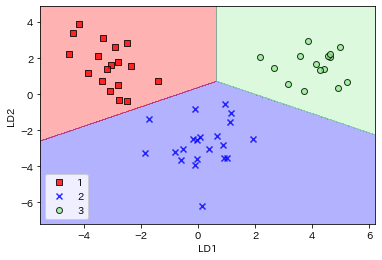

In [108]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.legend()
plt.xlabel('LD1')
plt.ylabel('LD2')

In [109]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh

In [122]:
def rbf_kernel_pca(X, gamma, n_components):
    """ RBF Kernal PCA implementation
    
    Parameters
    ----------
    X: {Numpy ndarray}, shape=[n_samples, n_features]
    
    gamma: float
        Tuning parameters of the RBF kernel
    n_components: int
        Number of priciple components
    
    Returns
    -------
    X_pc: {Numpy ndarray}, shape=[n_samples, k_features]
        Projected dataset
    """
    # calculate pairwise squared Euclidean distances in teh MxN dimentional dataset
    sq_dists = pdist(X, 'sqeuclidean')
    
    # convert pairwise distances into a square matrix
    mat_sq_dists = squareform(sq_dists)
    
    # compute the symmetric kernel matrix
    K = exp(-gamma * mat_sq_dists)
    
    # center the kernel matrix
    N = K.shape[0]
    one_n = np.ones((N, N))/N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    # obtain eigenpairs from the centered kernel matrix
    # scipy.linalg.eigh returns them in ascending order
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]
    
    # collect the top k eigenvectors (projected samples)
    X_pc = np.column_stack((eigvecs[:, i] for i in range(n_components)))
    return X_pc

In [117]:
X = [
    [0, 0, 0],
    [1, 2, 3],
    [-1, 2, 3],
    [3, 2, 0]
]

In [121]:
pdist(X)

array([3.7417, 3.7417, 3.6056, 2.    , 3.6056, 5.    ])

In [120]:
squareform(pdist(X))

array([[0.    , 3.7417, 3.7417, 3.6056],
       [3.7417, 0.    , 2.    , 3.6056],
       [3.7417, 2.    , 0.    , 5.    ],
       [3.6056, 3.6056, 5.    , 0.    ]])

In [123]:
from sklearn.datasets import make_moons

In [124]:
X, y = make_moons(n_samples=100, random_state=123)

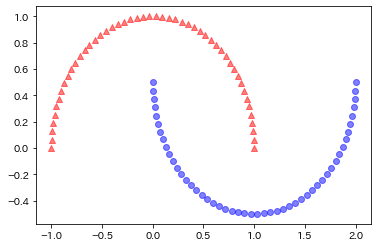

In [126]:
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=.5)

In [127]:
from sklearn.decomposition import PCA

In [128]:
scikit_pca = PCA(n_components=2)

In [129]:
X_spca = scikit_pca.fit_transform(X)

In [134]:
X[:5]

array([[ 0.8713,  0.4907],
       [ 0.7155, -0.4587],
       [ 1.4625, -0.3866],
       [-0.2225,  0.9749],
       [ 0.3277, -0.2403]])

In [133]:
X_spca[:5]

array([[-0.2796,  0.343 ],
       [-0.4225, -0.6084],
       [-1.1114, -0.3106],
       [ 0.9101,  0.4683],
       [ 0.0136, -0.5195]])

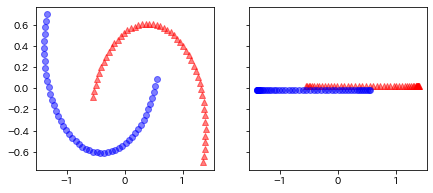

In [137]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3), sharey=True)
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1], color='red', marker='^', alpha=.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1], color='blue', marker='o', alpha=.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((50,1))-0.02, color='blue', marker='o', alpha=.5)

In [138]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

/Users/shouta_shimizu/.local/share/virtualenvs/python-machine-learning-6hUrazaR/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
/Users/shouta_shimizu/.local/share/virtualenvs/python-machine-learning-6hUrazaR/lib/python3.7/site-packages/ipykernel_launcher.py:38: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


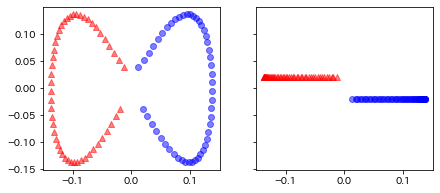

In [139]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3), sharey=True)
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', marker='^', alpha=.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', marker='o', alpha=.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02, color='blue', marker='o', alpha=.5)

In [140]:
from sklearn.datasets import make_circles

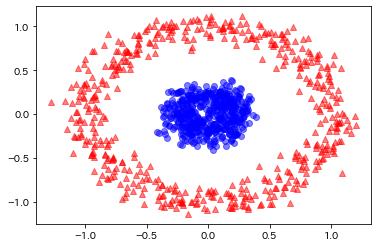

In [143]:
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)

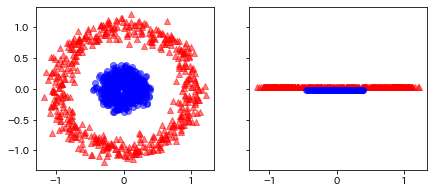

In [145]:
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(1, 2, figsize=(7, 3), sharey=True)
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1], color='red', marker='^', alpha=.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1], color='blue', marker='o', alpha=.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((500,1))+0.02, color='red', marker='^', alpha=.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((500,1))-0.02, color='blue', marker='o', alpha=.5)

/Users/shouta_shimizu/.local/share/virtualenvs/python-machine-learning-6hUrazaR/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
/Users/shouta_shimizu/.local/share/virtualenvs/python-machine-learning-6hUrazaR/lib/python3.7/site-packages/ipykernel_launcher.py:38: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


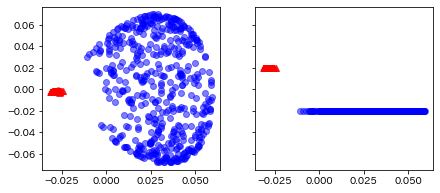

In [146]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

fig, ax = plt.subplots(1, 2, figsize=(7, 3), sharey=True)
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', marker='^', alpha=.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', marker='o', alpha=.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((500,1))+0.02, color='red', marker='^', alpha=.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((500,1))-0.02, color='blue', marker='o', alpha=.5)

In [151]:
def rbf_kernel_pca(X, gamma, n_components):
    """ RBF Kernal PCA implementation
    
    Parameters
    ----------
    X: {Numpy ndarray}, shape=[n_samples, n_features]
    
    gamma: float
        Tuning parameters of the RBF kernel
    n_components: int
        Number of priciple components
    
    Returns
    -------
    X_pc: {Numpy ndarray}, shape=[n_samples, k_features]
        Projected dataset
    lambdas: list
        Eigenvalues
    """
    # calculate pairwise squared Euclidean distances in teh MxN dimentional dataset
    sq_dists = pdist(X, 'sqeuclidean')
    
    # convert pairwise distances into a square matrix
    mat_sq_dists = squareform(sq_dists)
    
    # compute the symmetric kernel matrix
    K = exp(-gamma * mat_sq_dists)
    
    # center the kernel matrix
    N = K.shape[0]
    one_n = np.ones((N, N))/N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    # obtain eigenpairs from the centered kernel matrix
    # scipy.linalg.eigh returns them in ascending order
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]
    
    # collect the top k eigenvectors (projected samples)
    alphas = np.column_stack((eigvecs[:, i] for i in range(n_components)))
    
    # collect the corresponding eigenvalues
    lambdas = [eigvals[i] for i in range(n_components)]
    return alphas, lambdas 

In [152]:
X, y = make_moons(n_samples=100, random_state=123)

In [153]:
alphas, lambdas = rbf_kernel_pca(X, gamma=15, n_components=1) 

/Users/shouta_shimizu/.local/share/virtualenvs/python-machine-learning-6hUrazaR/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
/Users/shouta_shimizu/.local/share/virtualenvs/python-machine-learning-6hUrazaR/lib/python3.7/site-packages/ipykernel_launcher.py:40: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


In [154]:
x_new = X[25]

In [155]:
x_new

array([1.8713, 0.0093])

In [156]:
x_proj = alphas[25] # original

In [158]:
x_proj

array([0.0788])

In [165]:
def project_x(x_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum((x_new-row)**2) for row in X])
    k = np.exp(-gamma * pair_dist)
    return k.dot(alphas/lambdas)

In [166]:
x_reproj = project_x(x_new, X, gamma=15, alphas=alphas, lambdas=lambdas)

In [167]:
x_reproj

array([0.0788])

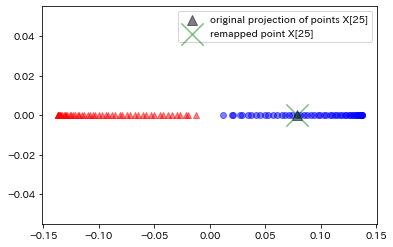

In [175]:
plt.scatter(alphas[y==0, 0], np.zeros(50), color='red', marker='^', alpha=.5)
plt.scatter(alphas[y==1, 0], np.zeros(50), color='blue', marker='o', alpha=.5)
plt.scatter(x_proj, 0, color='black', marker='^', alpha=.5, label='original projection of points X[25]', s=100)
plt.scatter(x_reproj, 0, color='green', marker='x', alpha=.5, label='remapped point X[25]', s=500)
plt.legend()

In [176]:
from sklearn.decomposition import KernelPCA
X, y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

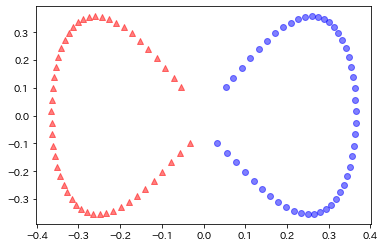

In [177]:
plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1], color='blue', marker='o', alpha=0.5)